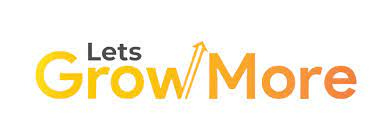

 <b>TASK 2} Stock market Prediction and Forecasting|| September 2021 || Data Science Internship
   <br><br> Author</b>- Aayushi Dighe 

In [1]:
#import packages
import pandas as pd
import numpy as np
import tensorflow as tf
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


In [2]:
#read the file
df = pd.read_csv(r"C:\Users\Hp\Downloads\NSE-TATAGLOBAL11.csv")
#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

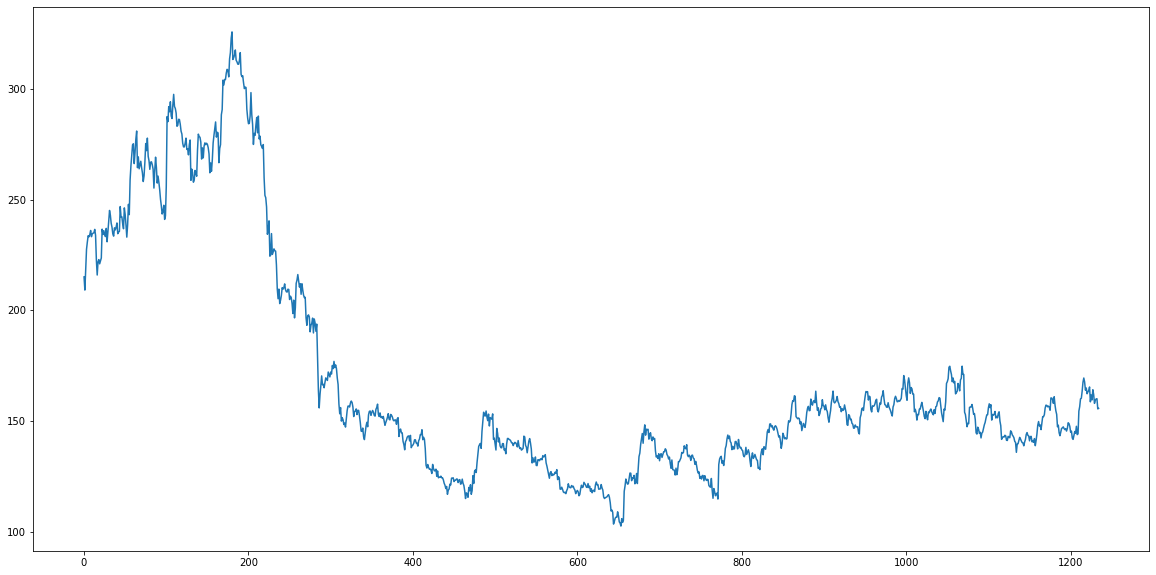

In [8]:
plt.plot(df1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.50425818]
 [0.47758853]
 [0.51792918]
 ...
 [0.25773196]
 [0.2371134 ]
 [0.23823398]]


In [11]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(926, 309)

In [13]:
train_data

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       [0.56006275],
       [0.57485433],
       [0.58762887],
       [0.58538772],
       [0.58987001],
       [0.59816226],
       [0.58561183],
       [0.59143882],
       [0.59278351],
       [0.59345585],
       [0.60040341],
       [0.58852532],
       [0.53787539],
       [0.50806813],
       [0.5349619 ],
       [0.53922008],
       [0.53070372],
       [0.53675482],
       [0.5425818 ],
       [0.60085164],
       [0.59009413],
       [0.59771403],
       [0.5912147 ],
       [0.58583595],
       [0.60242044],
       [0.57530255],
       [0.59524877],
       [0.61810847],
       [0.63872703],
       [0.62909009],
       [0.61272972],
       [0.60466159],
       [0.5912147 ],
       [0.58673241],
       [0.60354101],
       [0.59928283],
       [0.6048857 ],
       [0.61340206],
       [0.59166293],
       [0.59524877],
       [0.59614523],
       [0.64657104],
       [0.62550426],
       [0.62572837],
       [0.611

In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step) # reshape into X=t,t+1,t+2,t+3 and Y=t+4
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(825, 100)
(825,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(208, 100)
(208,)


(None, None)

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1) # reshape input to be [samples, time steps, features] which is required for LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 8s 603ms/step - loss: 0.0342 - val_loss: 0.0033
Epoch 2/100
13/13 [==============================] - 4s 334ms/step - loss: 0.0060 - val_loss: 0.0012
Epoch 3/100
13/13 [==============================] - 4s 319ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 4/100
13/13 [==============================] - 4s 313ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 5/100
13/13 [==============================] - 4s 305ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 6/100
13/13 [==============================] - 4s 311ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 7/100
13/13 [==============================] - 4s 320ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 8/100
13/13 [==============================] - 4s 314ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 9/100
13/13 [==============================] - 4s 312ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 10/100
13/13 [==============================] - 4s 317ms/step - loss: 0.0021 - val_lo

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test) ### the prediction and check performance metrics

In [23]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict) #Transformback to original form

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) #Calculate RMSE performance metrics

174.08105734883475

In [25]:
math.sqrt(mean_squared_error(ytest,test_predict)) 

152.4836528002111

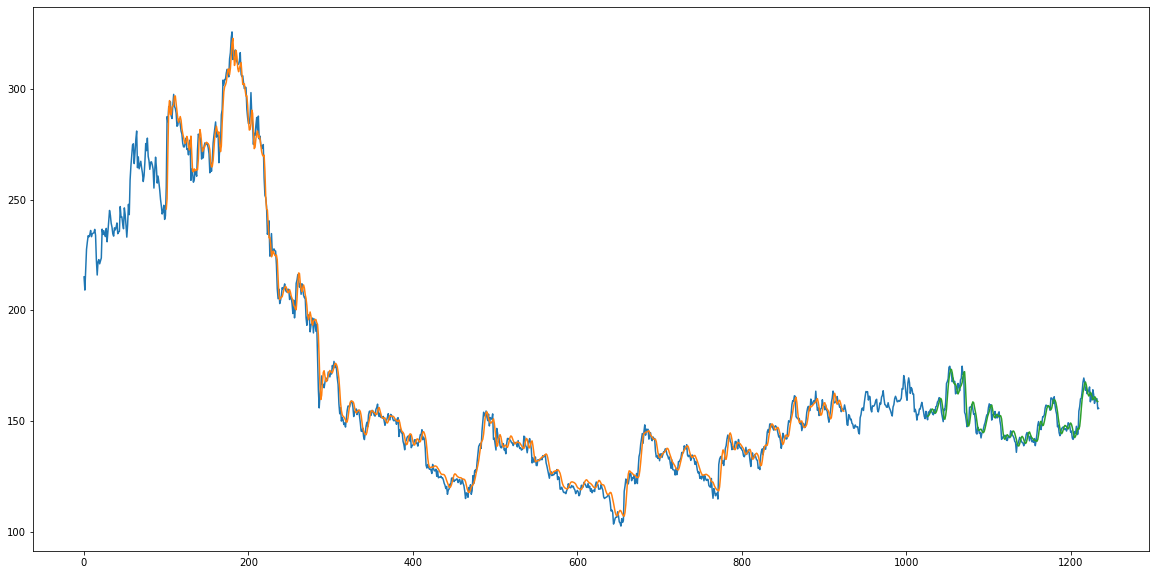

In [26]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
### Plotting 
# shift train predictions for plotting

In [27]:
len(test_data)

309

In [28]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 0)

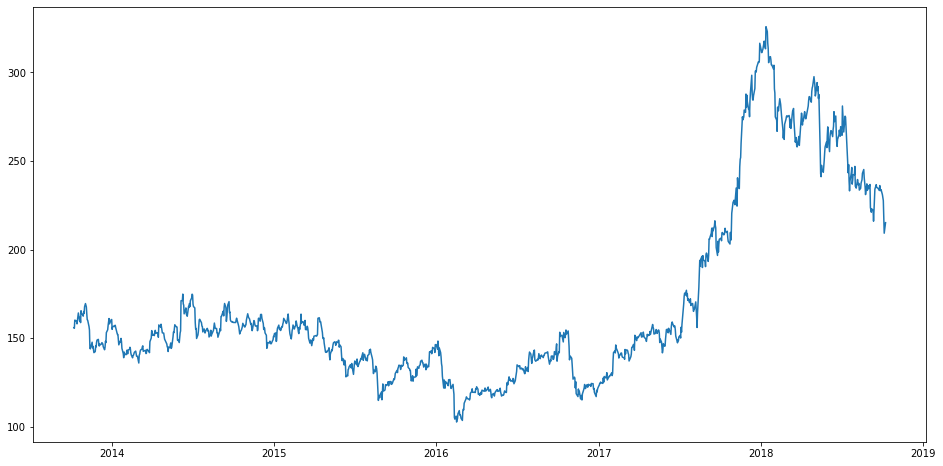

In [29]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [30]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,False,False,False,False,False,False,False,False
2018-10-05,False,False,False,False,False,False,False,False
2018-10-04,False,False,False,False,False,False,False,False
2018-10-03,False,False,False,False,False,False,False,False
2018-10-01,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2013-10-14,False,False,False,False,False,False,False,False
2013-10-11,False,False,False,False,False,False,False,False
2013-10-10,False,False,False,False,False,False,False,False


In [31]:
print('Shape of Data:',df.shape)

Shape of Data: (1235, 8)


In [32]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [33]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [34]:
train = new_data[:987]
valid = new_data[987:]

In [35]:
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(987, 2)


In [36]:
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(248, 2)


In [37]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [38]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
104.51415465984348


<ipython-input-39-51ea2c681073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-39-51ea2c681073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


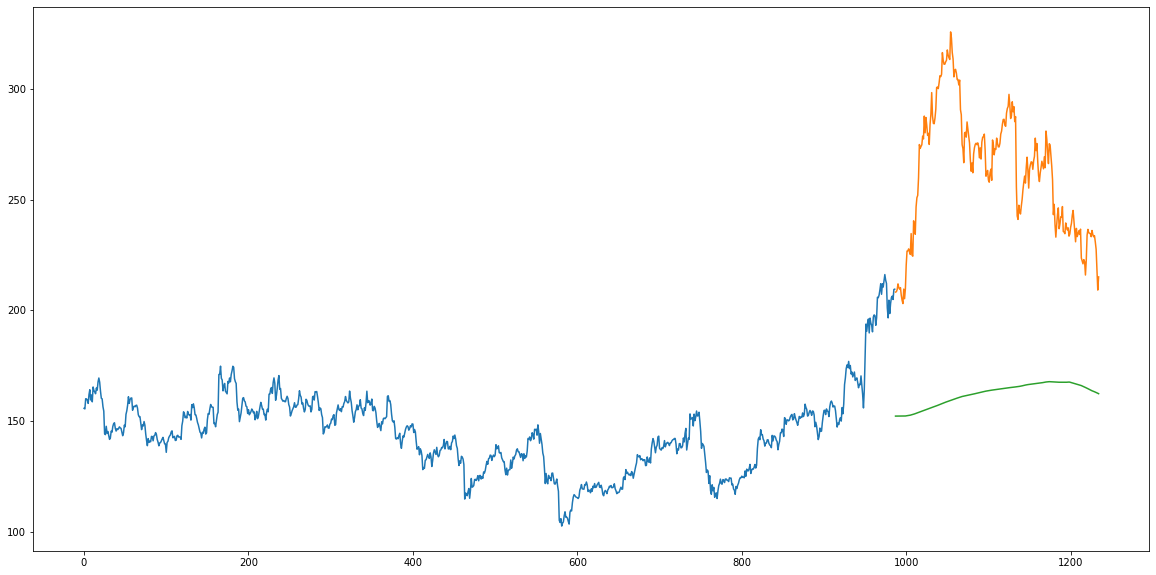

In [39]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])